In [3]:
import os
from pathlib import Path
import numpy as np
import mne
from scipy import stats
import pandas as pd
import random

# Use neurodsp for convenience
from neurodsp.plts import plot_time_series, plot_power_spectra
from neurodsp.spectral import compute_spectrum

# Import fooof for checking model fits
from fooof import FOOOF
from fooof import FOOOFGroup
from fooof.plts.annotate import plot_annotated_model, plot_annotated_model2
from fooof.utils.params import compute_knee_frequency

# Plotting functions
from spiketools.plts.utils import make_axes
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table 

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Import custom project code
import sys
sys.path.append("/home/b1044271/Columbia/Aperiodic_sleep/helpers")
from utils import check_distribution, perform_correlation, compute_z_values, bonferroni_correction, friedman_dunns
from plots import plot_annotated_modelx

 # SET PSD calculation and FOOOF PARAMETERS

In [5]:
f_min = 1
f_max = 45
t     = 15
fs    = 200
SETTINGS_W  = { 'method' : 'welch', 'average' : 'mean', 'fmin' :f_min , 'fmax':f_max, 'n_fft': fs*t, 'n_overlap': fs*t*0.5}

SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}
SETTINGS_F2={'max_n_peaks':8, 'aperiodic_mode':'fixed'}


# Set the vectors to store the results

In [6]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set result path
result_path = Path('/home/b1044271/Columbia/Results/iEEG')
# Set dataset
dataset = 'Wakefulness_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

In [7]:
W_Kn  = np.zeros([len(regions)-4,200])*np.nan
W_Exp = np.zeros([len(regions)-4,200])*np.nan
W_Exp2 = np.zeros([len(regions)-4,200])*np.nan
W_R2K = np.zeros([len(regions)-4,200])*np.nan
W_R2N = np.zeros([len(regions)-4,200])*np.nan


N2_Kn  = np.zeros([len(regions)-4,200])*np.nan
N2_Exp = np.zeros([len(regions)-4,200])*np.nan
N2_Exp2 = np.zeros([len(regions)-4,200])*np.nan
N2_R2K = np.zeros([len(regions)-4,200])*np.nan
N2_R2N = np.zeros([len(regions)-4,200])*np.nan

N3_Kn  = np.zeros([len(regions)-4,200])*np.nan
N3_Exp = np.zeros([len(regions)-4,200])*np.nan
N3_Exp2 = np.zeros([len(regions)-4,200])*np.nan
N3_R2K = np.zeros([len(regions)-4,200])*np.nan
N3_R2N = np.zeros([len(regions)-4,200])*np.nan

R_Kn  = np.zeros([len(regions)-4,200])*np.nan
R_Exp = np.zeros([len(regions)-4,200])*np.nan
R_Exp2 = np.zeros([len(regions)-4,200])*np.nan
R_R2K = np.zeros([len(regions)-4,200])*np.nan
R_R2N = np.zeros([len(regions)-4,200])*np.nan


# WAKEFULNESS

In [34]:
PSDs_W =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_W[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    
    # parameters exctract
    W_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    W_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    W_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
   
    W_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    W_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')


    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Angular gyrus_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 53 power spectra.
Running FOOOFGroup across 53 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior cingulate_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Anterior insula_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 71 power spectra.
Running FOOOFGroup across 71 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iE

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 43 power spectra.
Running FOOOFGroup across 43 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior and middle occipital gyri_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 21 power spectra.
Running FOOOFGroup across 21 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior frontal gyrus and frontal pole_W.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 89 power spectra.
Running FOOOFGroup across 89 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/Wakefulness_AllRegions/Superior parietal lobule_W.edf...
EDF fi

# N2

In [35]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N2_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_N2 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N2[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
       
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N2_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N2_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    N2_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
    
    N2_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    N2_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Angular gyrus_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior cingulate_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Anterior insula_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Calcarine 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 16 power spectra.
Running FOOOFGroup across 16 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Superior frontal gyrus and frontal pole_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 78 power spectra.
Running FOOOFGroup across 78 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Superior parietal lobule_N.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 40 power spectra.
Running FOOOFGroup across 40 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N2_AllRegions/Superior temporal gyrus_N.edf...
EDF file detected
Setting channel info struc

# N3

In [36]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'N3_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))


PSDs_N3 =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_N3[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
 
    # parameters exctract
    N3_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    N3_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    N3_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
    
    N3_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    N3_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Angular gyrus_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 52 power spectra.
Running FOOOFGroup across 52 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior cingulate_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 31 power spectra.
Running FOOOFGroup across 31 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Anterior insula_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 54 power spectra.
Running FOOOFGroup across 54 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Calcarine 

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 16 power spectra.
Running FOOOFGroup across 16 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Superior frontal gyrus and frontal pole_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 78 power spectra.
Running FOOOFGroup across 78 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Superior parietal lobule_D.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 40 power spectra.
Running FOOOFGroup across 40 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/N3_AllRegions/Superior temporal gyrus_D.edf...
EDF file detected
Setting channel info struc

# REM 

In [37]:
# Set data path
data_path = Path('/home/b1044271/Columbia/iEEG')
# Set dataset
dataset = 'REM_AllRegions'
# Get list of files, which correspond to regions
regions = np.sort(os.listdir(data_path / dataset))

PSDs_R =  np.zeros([len(regions)-4,661])*np.nan

i =0 
for C, V in enumerate(regions):
    
    if C == 0 or C== 8 or C==10 or C==35:
        continue
        
    EEG = mne.io.read_raw_edf(data_path / dataset / V)
    EEG_psd = EEG.compute_psd(**SETTINGS_W)
    
    PSDs_R[i,0:661] = np.mean(EEG_psd._data,0)
    
    fm1 = FOOOFGroup(**SETTINGS_F1)
    fm1.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
     
    fm2 = FOOOFGroup(**SETTINGS_F2)
    fm2.fit(EEG_psd._freqs, EEG_psd._data, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    # parameters exctract
    R_Kn[i,0:len(EEG_psd._data)]  = fm1.get_params('aperiodic_params','knee')
    R_Exp[i,0:len(EEG_psd._data)] = fm1.get_params('aperiodic_params','exponent')
    
    R_Exp2[i,0:len(EEG_psd._data)] = fm2.get_params('aperiodic_params','exponent')
    
    R_R2K[i,0:len(EEG_psd._data)] = fm1.get_params('r_squared')
    R_R2N[i,0:len(EEG_psd._data)] = fm2.get_params('r_squared')

    i = i+1

Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Angular gyrus_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 42 power spectra.
Running FOOOFGroup across 42 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior cingulate_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 19 power spectra.
Running FOOOFGroup across 19 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Anterior insula_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 35 power spectra.
Running FOOOFGroup across 35 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Calcar

EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 14 power spectra.
Running FOOOFGroup across 14 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior frontal gyrus and frontal pole_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 64 power spectra.
Running FOOOFGroup across 64 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior parietal lobule_R.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 15.000 (s)
Running FOOOFGroup across 36 power spectra.
Running FOOOFGroup across 36 power spectra.
Extracting EDF parameters from /home/b1044271/Columbia/iEEG/REM_AllRegions/Superior temporal gyrus_R.edf...
EDF file detected
Setting channel info st

# SAVE DATA

In [40]:
# SAVING
result_path2 = Path('/home/b1044271/Columbia/Results/iEEG/New')

# Helper function for paths, check for the path and creates ones if not found
def check_path(path):
    if not os.path.exists(path):
        os.mkdir(path)

check_path(result_path2)

# SAVE PSDs
np.save(Path(result_path2 /'iEEG_t15_F45_W.npy'),PSDs_W)
np.save(Path(result_path2 /'iEEG_t15_F45_N2.npy'),PSDs_N2)
np.save(Path(result_path2 /'iEEG_t15_F45_N3.npy'),PSDs_N3)
np.save(Path(result_path2 /'iEEG_t15_F45_R.npy'),PSDs_R)

# SAVE EXPs of the KNEE
np.save(Path(result_path2 /'iEEG_t15_F45_ExpK_W.npy'),W_Exp)
np.save(Path(result_path2 /'iEEG_t15_F45_ExpK_N2.npy'),N2_Exp)
np.save(Path(result_path2 /'iEEG_t15_F45_ExpK_N3.npy'),N3_Exp)
np.save(Path(result_path2 /'iEEG_t15_F45_ExpK_R.npy'),R_Exp)

# SAVE KNEE VALUEs
np.save(Path(result_path2 /'iEEG_t15_F45_KK_W.npy'),W_Kn)
np.save(Path(result_path2 /'iEEG_t15_F45_KK_N2.npy'),N2_Kn)
np.save(Path(result_path2 /'iEEG_t15_F45_KK_N3.npy'),N3_Kn)
np.save(Path(result_path2 /'iEEG_t15_F45_KK_R.npy'),R_Kn)

# SAVE EXPs OF THE FIXED MODEL
np.save(Path(result_path2 /'iEEG_t15_F45_ExpF_W.npy'),W_Exp2)
np.save(Path(result_path2 /'iEEG_t15_F45_ExpF_N2.npy'),N2_Exp2)
np.save(Path(result_path2 /'iEEG_t15_F45_ExpF_N3.npy'),N3_Exp2)
np.save(Path(result_path2 /'iEEG_t15_F45_ExpF_R.npy'),R_Exp2)

# SAVE R2 VALUEs of Knee model
np.save(Path(result_path2 /'iEEG_t15_F45_R2K_W.npy'),W_R2K)
np.save(Path(result_path2 /'iEEG_t15_F45_R2K_N2.npy'),N2_R2K)
np.save(Path(result_path2 /'iEEG_t15_F45_R2K_N3.npy'),N3_R2K)
np.save(Path(result_path2 /'iEEG_t15_F45_R2K_R.npy'),R_R2K)

# SAVE R2 values OF THE FIXED MODEL
np.save(Path(result_path2 /'iEEG_t15_F45_R2F_W.npy'),W_R2N)
np.save(Path(result_path2 /'iEEG_t15_F45_R2F_N2.npy'),N2_R2N)
np.save(Path(result_path2 /'iEEG_t15_F45_R2F_N3.npy'),N3_R2N)
np.save(Path(result_path2 /'iEEG_t15_F45_R2F_R.npy'),R_R2N)

# SAVE FREQS ARRAY
np.save(Path(result_path2 /'iEEG_t15_F45_Freqs.npy'),EEG_psd.freqs)


# Compute knee frequency
Kn_W = compute_knee_frequency(W_Kn, W_Exp)
Kn_N2 = compute_knee_frequency(N2_Kn, N2_Exp)
Kn_N3 = compute_knee_frequency(N3_Kn, N3_Exp)
Kn_R = compute_knee_frequency(R_Kn, R_Exp)

# SAVE KNEE VALUEs
np.save(Path(result_path2 /'iEEG_t15_F45_KF_W.npy'),Kn_W)
np.save(Path(result_path2 /'iEEG_t15_F45_KF_N2.npy'),Kn_N2)
np.save(Path(result_path2 /'iEEG_t15_F45_KF_N3.npy'),Kn_N3)
np.save(Path(result_path2 /'iEEG_t15_F45_KF_R.npy'),Kn_R)


In [38]:
np.shape(PSDs_W)

(34, 661)


# START FROM HERE TO LOAD DATA AND PLOT

In [12]:
result_path = '/home/b1044271/Columbia/Results/iEEG/'

# PSDs
PSDs_R = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_R.npy') 
PSDs_W = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_W.npy') 
PSDs_N2 = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_N2.npy') 
PSDs_N3 = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_N3.npy') 

# FREQS
Freqs = np.load('/home/b1044271/Columbia/Results/iEEG/' + 'iEEG_t15_F45_Freqs.npy')  

# FOOOF
Exp_R = np.load(result_path + 'iEEG_t15_F45_ExpK_W.npy') 
PSD_W = np.load(result_path + 'iEEG_t15_F45_ExpK_N2.npy') 
PSD_N2 = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_N2.npy') 
PSD_N3 = np.load('/home/b1044271/Columbia/Results/iEEG/PSDs/' + 'iEEG_t15_F45_N3.npy') 


In [12]:
Freqs = np.load('/home/b1044271/Columbia/Results/iEEG/' + 'iEEG_t15_F45_Freqs.npy')  



## PLOTTING REGIONS PSDs

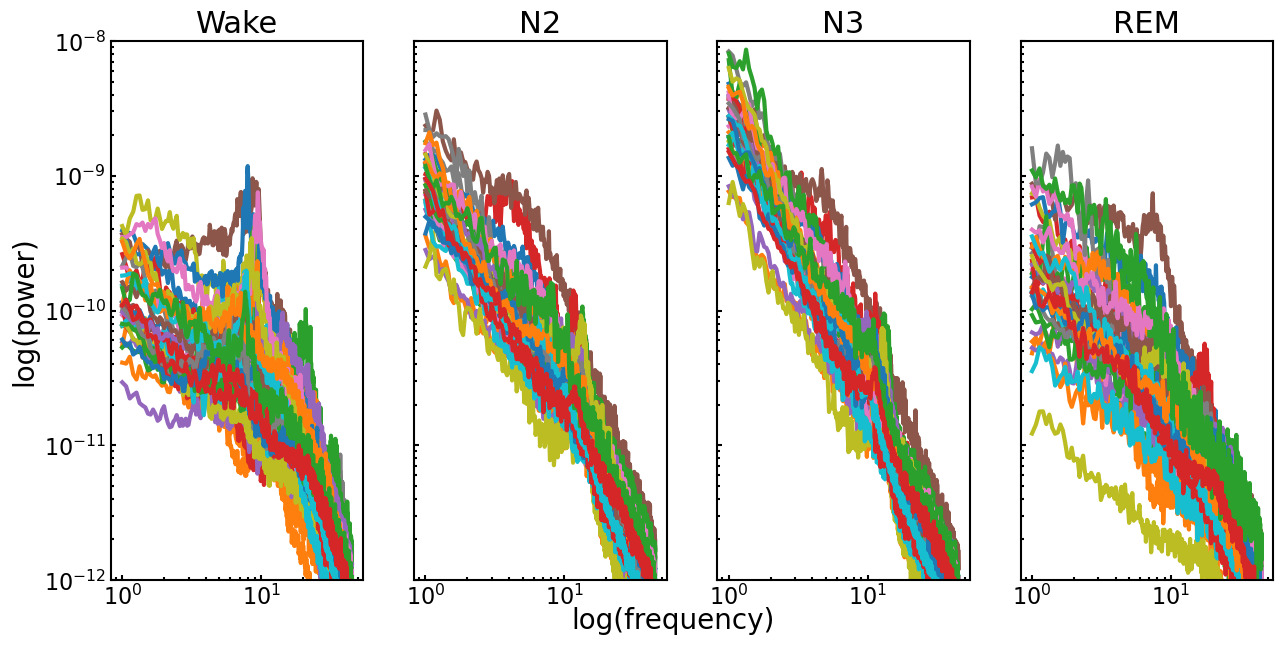

In [13]:
array_list = [PSDs_W,PSDs_N2, PSDs_N3 ,PSDs_R]
titles =  ['Wake','N2','N3' ,'REM']

# Plotting
fig, ax = plt.subplots(1,4, sharex=True, sharey=True, figsize=(15,7.))

for i, V in enumerate(array_list):
    ax[i].loglog(Freqs,np.transpose(V), linewidth=3)
    ax[i].set_title(titles[i], fontsize =22)
    ax[i].set_ylim([10e-13 ,10e-9])

fig.text(0.5, 0.04, 'log(frequency)', ha='center', fontsize = 20)
ax[0].set_ylabel('log(power)', fontsize = 20)

for axs in ax.flatten():
    axs.spines['top'].set_linewidth(1.5)
    axs.spines['right'].set_linewidth(1.5)
    axs.spines['bottom'].set_linewidth(1.5)
    axs.spines['left'].set_linewidth(1.5)   # Set the linewidth of the left axis line
    axs.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties

#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_slope_knee_regions.svg", dpi = 600)


## PLOT GRAND AVERAGE PSD PER STAGE

In [17]:
kp2 = [PSD_Wm[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[0]]] ,
    PSD_N2m[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[1]]] ,
    PSD_N3m[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[2]]],
    PSD_Rm[[iv for iv in range(len(Freqs)) if Freqs[iv] == Knee_av_array[3]]]]

kp21 = [item for sublist in kp2 for item in sublist]

NameError: name 'PSD_Wm' is not defined

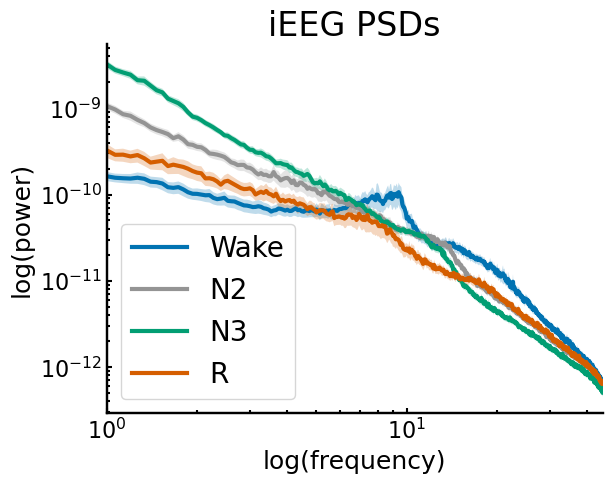

In [31]:
array_list = [PSDs_W, PSDs_R,PSDs_N2, PSDs_N3]
#fig = plt.figure(figsize=(12, 10))    
#ax = fig.add_subplot(1, 1, 1) 

PSD_Ws = stats.sem(PSDs_W,0, nan_policy = 'omit')
PSD_Wm = np.nanmean(PSDs_W,axis=0)

PSD_Rs = stats.sem(PSDs_R,0, nan_policy = 'omit')
PSD_Rm = np.nanmean(PSDs_R,axis=0)

PSD_N2s = stats.sem(PSDs_N2,0, nan_policy = 'omit')
PSD_N2m = np.nanmean(PSDs_N2,axis=0)

PSD_N3s = stats.sem(PSDs_N3,0, nan_policy = 'omit')
PSD_N3m = np.nanmean(PSDs_N3,axis=0)


plt.plot(EEG_psd._freqs,PSD_Wm, color = sns.color_palette("colorblind")[0], label='Wake', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_Wm-PSD_Ws, PSD_Wm+PSD_Ws,facecolor=sns.color_palette("colorblind")[0], alpha=0.25)

plt.plot(EEG_psd._freqs,PSD_N2m, color=sns.color_palette("colorblind")[7], label='N2', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_N2m-PSD_N2s, PSD_N2m+PSD_N2s,facecolor=sns.color_palette("colorblind")[7], alpha=0.25)

plt.plot(EEG_psd._freqs,PSD_N3m, color=sns.color_palette("colorblind")[2], label='N3', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_N3m-PSD_N3s, PSD_N3m+PSD_N3s,facecolor=sns.color_palette("colorblind")[2], alpha=0.25)

plt.plot(EEG_psd._freqs,PSD_Rm, color=sns.color_palette("colorblind")[3], label='R', linewidth = 3)
plt.fill_between(EEG_psd._freqs,PSD_Rm-PSD_Rs, PSD_Rm+PSD_Rs,facecolor=sns.color_palette("colorblind")[3], alpha=0.25)

# PLOT AVERAGE KNEE FREQUENCY Value
#seaborn.scatterplot(x=kf, y=kp, marker='o', color=['b','orange','green','r'], s=200, zorder=4, legend=False)

plt.ylabel('log(power)', fontsize=18)
plt.title('iEEG PSDs', fontsize = 24)
plt.xlabel('log(frequency)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(EEG_psd._freqs[0], EEG_psd._freqs[-1])
plt.legend(fontsize=20)
plt.yscale('log')
plt.xscale('log')
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/iEEG_Group_PSDs.svg", dpi = 600)


## Plot PSDs of the different stages with model annotations

In [9]:
array_list = [PSDs_W[10,:],PSDs_N2[10,:], PSDs_N3[10,:] ,PSDs_R[10,:]]
SETTINGS_F1={'max_n_peaks':8, 'aperiodic_mode':'knee'}
titles =  ['Wake','N2','N3' ,'REM']

#axes = iter(make_axes(1, 4, figsize=(25, 10)))

for i, V in enumerate(array_list):
    
    fmX = FOOOF(**SETTINGS_F2)
    fmX.fit(EEG_psd._freqs, V, [EEG_psd._freqs[0] , EEG_psd._freqs[-1]])
    plot_annotated_modelx(fmX, -12, -8.2,plt_log = True)

    Name = '/home/b1044271/Columbia/Plots/NOV23/iEEG_Group_PSDs_annotated_Fixed_'   + titles[i] + '.svg'
    #plt.savefig(Name, dpi = 600)

#   plt.xlim(np.log(EEG_psd._freqs[0]) , np.log(EEG_psd._freqs[-1]))
#   ax.set_xlabel('log(Frequency)')
#   ax.set_ylabel('log(Power)')   
#   ax.title.set_text(titles[i])
#   ax.set_ylim([10e-12 ,10e-9])
#   ax.set_xlim([np.log(np.min(Freqs)), np.log(np.min(Freqs))])

NameError: name 'PSDs_W' is not defined

## Define arrays for plotting different model parameters

In [43]:
array_list2 = [np.nanmean(Kn_W,1), np.nanmean(Kn_N2,1), np.nanmean(Kn_N3,1), np.nanmean(Kn_R,1)]
array_list3 = [np.nanmean(W_Exp,1), np.nanmean(N2_Exp,1), np.nanmean(N3_Exp,1), np.nanmean(R_Exp,1)]
array_list4 = [np.nanmean(W_Exp2,1), np.nanmean(N2_Exp2,1), np.nanmean(N3_Exp2,1), np.nanmean(R_Exp2,1)]
array_list5 = [np.nanmean(W_R2K,1), np.nanmean(N2_R2K,1), np.nanmean(N3_R2K,1), np.nanmean(R_R2K,1)]
array_list6 = [np.nanmean(W_R2N,1), np.nanmean(N2_R2N,1), np.nanmean(N3_R2N,1), np.nanmean(R_R2N,1)]

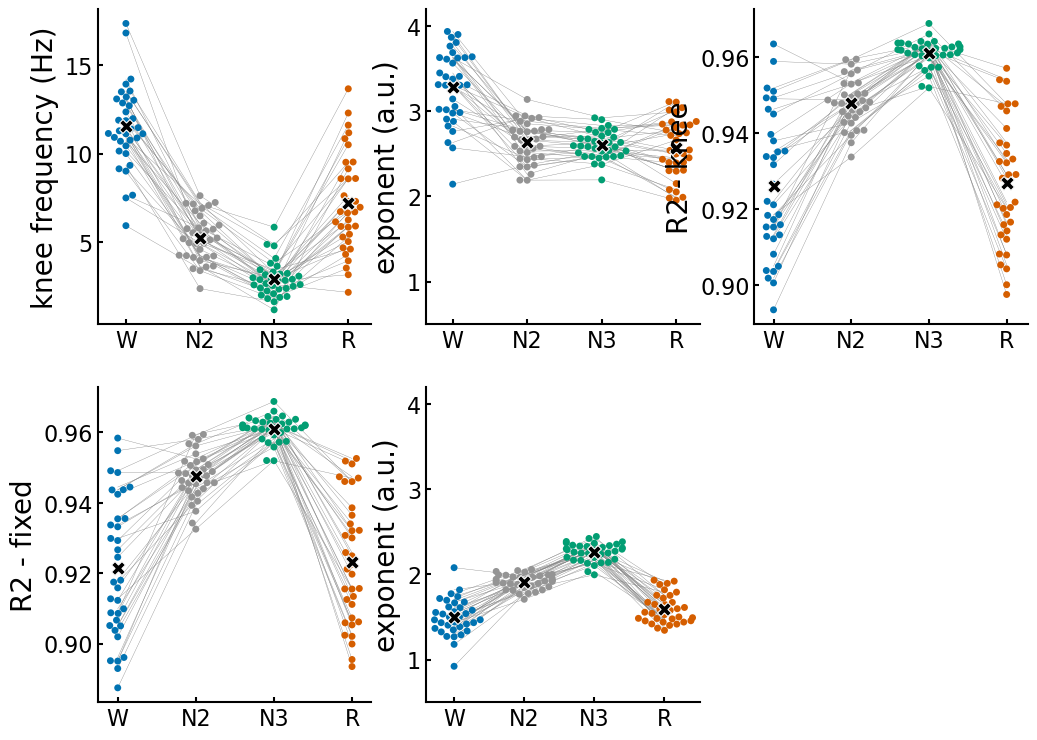

In [45]:
arrays = [array_list2, array_list3, array_list5, array_list6, array_list4]

ColStage = [sns.color_palette("colorblind")[0], sns.color_palette("colorblind")[7], 
        sns.color_palette("colorblind")[2],sns.color_palette("colorblind")[3]]

titles =  ['W','N2','N3','R']
y_label = ['knee frequency (Hz)' , 'exponent (a.u.)' , 'R2 - knee', 'R2 - fixed', 'exponent (a.u.)']
fig = plt.figure(figsize=(12, 9))  
#sns.set_theme(style='white')
sns.color_palette()

for i, V in enumerate(arrays):

    ax = fig.add_subplot(2, 3, i+1)

    ax = sns.swarmplot(data=V, palette = ColStage)
    plt.ylabel(y_label[i], fontsize = 20)
    ax.set_xticklabels(titles, fontsize = 20)
    sns.scatterplot(x=[0,1,2,3], y=np.mean(V,1), marker='X', color='black', s=100, zorder=4, legend=False)
    plt.plot([V[0], V[1], V[2], V[3]], color = 'grey', linewidth = 0.25, linestyle = '-')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    if i == 1 or i == 4:
        plt.ylim(0.5,4.2)
    
    if i == 4:
        plt.xlim(-0.40,3.5)   
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    
plt.savefig("/home/b1044271/Columbia/Plots/MAR24/iEEG_slope_knee_points.svg", dpi = 600)

# STATS

In [404]:
from scipy.stats import norm
def compute_z_values(p_values):
    """
    Calculate z-values from Dunn's test p-values.

    Parameters:
    - p_values: Array of p-values from pairwise comparisons.

    Returns:
    - Array of z-values.
    """
    # Ensure p-values are within the valid range [0, 1]
    p_values = np.clip(p_values, np.finfo(float).eps, 1 - np.finfo(float).eps)

    # Calculate two-sided z-values
    z_values = norm.ppf(1 - p_values / 2)

    return z_values

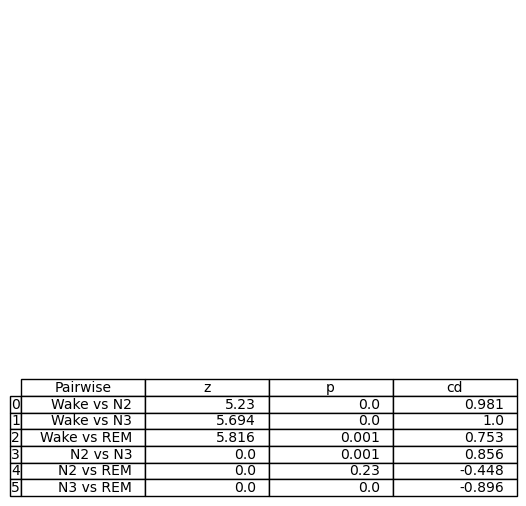

In [413]:
from pandas.plotting import table 

# KNEE - STATS
data = pd.DataFrame(np.transpose(array_list2))

friedman_result, W, posthoc_result, z_values, effect_sizes, corrected_p_values = friedman_dunns(data)

effect_sizes2 = pd.DataFrame(index=data.columns, columns=data.columns)
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        if i < j:
            effect_sizes2.loc[col1, col2] = cliffs_delta(data[col1], data[col2])[0]
            effect_sizes2.loc[col2, col1] = -effect_sizes2.loc[col1, col2]

# MAKE STAT TABLE

#add the relevant pairwise comaprisons
x = pd.DataFrame.to_numpy(corrected_p_values)
x2 = x.reshape(len(x)*len(x))
idx = [1,2,3,6,7,11] 
x3 = x2[idx]


y = pd.DataFrame.to_numpy(effect_sizes2)
y2 = y.reshape(len(y)*len(y))
y3 = y2[idx]
y3 = y3.astype(float)

z2 = z_values2.reshape(len(z_values)*len(z_values))
z3 = z2[idx]

# create an array with the names of the pairwise comparisons
pairwise_tests = ['Wake vs N2', 'Wake vs N3', 'Wake vs REM',  # WAKE    
                          'N2 vs N3' , 'N2 vs REM',   # N2
                       'N3 vs REM']  # REM

# create dataframe
data = {'Pairwise' : pairwise_tests,'z' : np.round(z3,3),'p' : np.round(x3,3),'cd' : np.round(y3,3)}

stat_df = pd.DataFrame(data)
stat_df.style.set_properties(**{'text-align': 'centre'})

# PLOTTING the table
ax = plt.subplot(111, frame_on=False) # no visible frame
table(ax, stat_df)  # where df is your data frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Stats/iEEG_KneeFreq_STATS.svg')

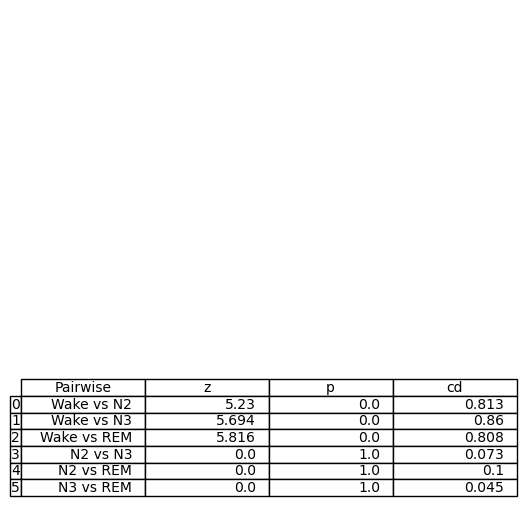

In [412]:
# EXP_K - STATS
data = pd.DataFrame(np.transpose(array_list3))

friedman_result, W, posthoc_result, z_values, effect_sizes, corrected_p_values = friedman_dunns(data)

z_values2 = compute_z_values(corrected_p_values)

effect_sizes2 = pd.DataFrame(index=data.columns, columns=data.columns)
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        if i < j:
            effect_sizes2.loc[col1, col2] = cliffs_delta(data[col1], data[col2])[0]
            effect_sizes2.loc[col2, col1] = -effect_sizes2.loc[col1, col2]

# MAKE STAT TABLE

#add the relevant pairwise comaprisons
x = pd.DataFrame.to_numpy(corrected_p_values)
x2 = x.reshape(len(x)*len(x))
idx = [1,2,3,6,7,11] 
x3 = x2[idx]


y = pd.DataFrame.to_numpy(effect_sizes2)
y2 = y.reshape(len(y)*len(y))
y3 = y2[idx]
y3 = y3.astype(float)

z2 = z_values2.reshape(len(z_values)*len(z_values))
z3 = z2[idx]

# create an array with the names of the pairwise comparisons
pairwise_tests = ['Wake vs N2', 'Wake vs N3', 'Wake vs REM',  # WAKE    
                          'N2 vs N3' , 'N2 vs REM',   # N2
                       'N3 vs REM']  # REM

# create dataframe
data = {'Pairwise' : pairwise_tests,'z' : np.round(z3,3),'p' : np.round(x3,3),'cd' : np.round(y3,3)}

stat_df = pd.DataFrame(data)
stat_df.style.set_properties(**{'text-align': 'centre'})

# PLOTTING the table
ax = plt.subplot(111, frame_on=False) # no visible frame
table(ax, stat_df)  # where df is your data frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Stats/iEEG_ExpKnee_STATS.svg')

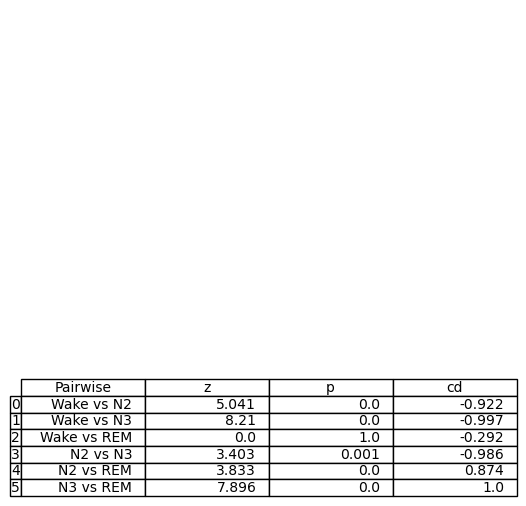

In [411]:
# EXP_Fixed - STATS
data = pd.DataFrame(np.transpose(array_list4))

friedman_result, W, posthoc_result, z_values, effect_sizes, corrected_p_values = friedman_dunns(data)

z_values2 = compute_z_values(corrected_p_values)

effect_sizes2 = pd.DataFrame(index=data.columns, columns=data.columns)
for i, col1 in enumerate(data.columns):
    for j, col2 in enumerate(data.columns):
        if i < j:
            effect_sizes2.loc[col1, col2] = cliffs_delta(data[col1], data[col2])[0]
            effect_sizes2.loc[col2, col1] = -effect_sizes2.loc[col1, col2]

# MAKE STAT TABLE

#add the relevant pairwise comaprisons
x = pd.DataFrame.to_numpy(corrected_p_values)
x2 = x.reshape(len(x)*len(x))
idx = [1,2,3,6,7,11] 
x3 = x2[idx]


y = pd.DataFrame.to_numpy(effect_sizes2)
y2 = y.reshape(len(y)*len(y))
y3 = y2[idx]
y3 = y3.astype(float)

z2 = z_values2.reshape(len(z_values)*len(z_values))
z3 = z2[idx]

# create an array with the names of the pairwise comparisons
pairwise_tests = ['Wake vs N2', 'Wake vs N3', 'Wake vs REM',  # WAKE    
                          'N2 vs N3' , 'N2 vs REM',   # N2
                       'N3 vs REM']  # REM

# create dataframe
data = {'Pairwise' : pairwise_tests,'z' : np.round(z3,3),'p' : np.round(x3,3),'cd' : np.round(y3,3)}

stat_df = pd.DataFrame(data)
stat_df.style.set_properties(**{'text-align': 'centre'})

# PLOTTING the table
ax = plt.subplot(111, frame_on=False) # no visible frame
table(ax, stat_df)  # where df is your data frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
plt.savefig('/home/b1044271/Columbia/Plots/NOV23/Stats/iEEG_ExpFixed_STATS.svg')

In [181]:
  # DATA
W_exp   = W_Exp[i][~np.isnan(W_Exp[i])]
W_knee  = W_Kn[i][~np.isnan(W_Kn[i])]
W_exp2  = W_Exp2[i][~np.isnan(W_Exp2[i])]


N2_exp   = N2_Exp[i][~np.isnan(N2_Exp[i])]
N2_knee  = N2_Kn[i][~np.isnan(N2_Kn[i])]
N2_exp2  = N2_Exp2[i][~np.isnan(N2_Exp2[i])]


N3_exp   = N3_Exp[i][~np.isnan(N3_Exp[i])]
N3_knee  = N3_Kn[i][~np.isnan(N3_Kn[i])]
N3_exp2  = N3_Exp2[i][~np.isnan(N3_Exp2[i])]

R_exp   = R_Exp[i][~np.isnan(R_Exp[i])]
R_knee  = R_Kn[i][~np.isnan(R_Kn[i])]
R_exp2  = R_Exp2[i][~np.isnan(R_Exp2[i])]


# Correlation between Knee Freq and Exp of fixed model

In [46]:
Set_Knee= np.squeeze(np.reshape(array_list2, (1,34*4)))
Set_ExpF = np.squeeze(np.reshape(array_list4, (1,34*4)))
Set_ExpK = np.squeeze(np.reshape(array_list3, (1,34*4)))

In [47]:
perform_correlation(Set_Knee,Set_ExpF)


Using Spearman correlation
Correlation: -0.8155717761557176
P-value: 1.2270325871514278e-33


In [48]:
perform_correlation(Set_Knee,Set_ExpK)


Using Spearman correlation
Correlation: 0.6988311626353704
P-value: 3.0921288697175592e-21


## PLOT CORRELATION

In [49]:
data = {'Knee' : Set_Knee,
       'Exp_knee' : Set_ExpK,
       'Exp_fixed' : Set_ExpF,
       'Stages' : np.repeat(['W','N2','N3','R'], 34, axis=0)}

df = pd.DataFrame(data)

<Figure size 300x600 with 0 Axes>

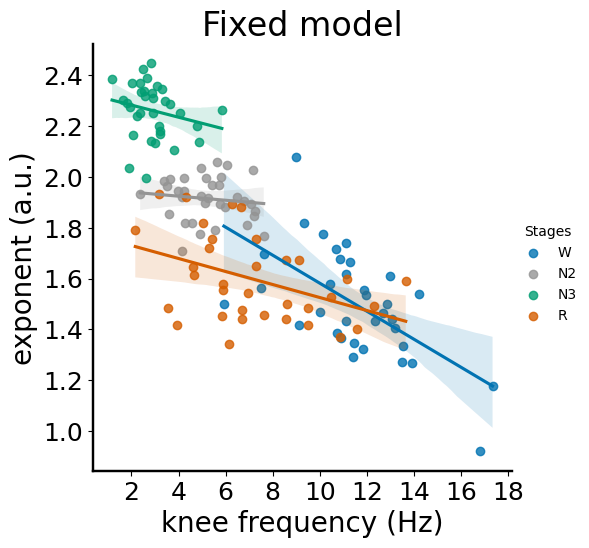

In [56]:
# PLOT correlations 
plt.figure(figsize=(3,6))  
sns.lmplot(x="Knee", y="Exp_fixed", hue="Stages", data=df, palette = ColStage);

ax=plt.gca()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('exponent (a.u.)',fontsize=20)
plt.xlabel('knee frequency (Hz)',fontsize=20)
plt.title('Fixed model', fontsize = 24)
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/iEEG_Correlations_FixedM.svg", dpi = 600)


<Figure size 300x400 with 0 Axes>

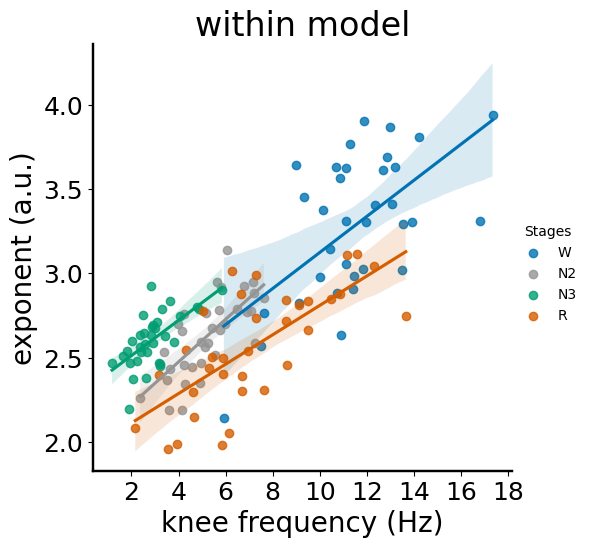

In [58]:
plt.figure(figsize=(3,4))  

sns.lmplot(x="Knee", y="Exp_knee", hue="Stages", data=df, palette = ColStage);

ax=plt.gca()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel('exponent (a.u.)',fontsize=20)
plt.xlabel('knee frequency (Hz)',fontsize=20)
plt.title('within model', fontsize = 24)
ax.spines['bottom'].set_linewidth(1.75)
ax.spines['left'].set_linewidth(1.75)

plt.savefig("/home/b1044271/Columbia/Plots/MAR24/iEEG_Correlations_KneeM.svg", dpi = 600)

## correlation per stage

In [63]:
a,b,v,d,c = perform_correlation(array_list2[0],array_list3[0])
perform_correlation(array_list2[1],array_list3[1])
perform_correlation(array_list2[2],array_list3[2])
perform_correlation(array_list2[3],array_list3[3])

perform_correlation(array_list2[0],array_list4[0])
perform_correlation(array_list2[1],array_list4[1])
perform_correlation(array_list2[2],array_list4[2])
perform_correlation(array_list2[3],array_list4[3])

Using Pearson correlation
Correlation: 0.5899534330402461
P-value: 0.00024055956127345802


TypeError: cannot unpack non-iterable NoneType object

# Decoding


In [383]:
# repititions and 
lin_method = RepeatedStratifiedKFold (n_splits = 5, n_repeats = 2, random_state = 1)

# Set up the repeated k-fold cross-validation
lin_method = RepeatedKFold(n_splits=5, n_repeats=2)


random.seed(0)

trials=np.zeros(34)*np.nan

accuracy_K=[]
accuracy_F=[]
accuracy_knee=[]


for i in np.arange(34):

    # Initialize the LDA classifier
    lda = LinearDiscriminantAnalysis()
 ##################################################   
    # DATA
    W_exp   = W_Exp[i][~np.isnan(W_Exp[i])]
    W_knee  = Kn_W[i][~np.isnan(Kn_W[i])]
    mask = np.isfinite(W_knee)
    W_knee = W_knee[mask]
    W_exp2  = W_Exp2[i][~np.isnan(W_Exp2[i])]

    N2_exp   = N2_Exp[i][~np.isnan(N2_Exp[i])]
    N2_knee  = Kn_N2[i][~np.isnan(Kn_N2[i])]
    N2_exp2  = N2_Exp2[i][~np.isnan(N2_Exp2[i])]

    N3_exp   = N3_Exp[i][~np.isnan(N3_Exp[i])]
    N3_knee  = Kn_N3[i][~np.isnan(Kn_N3[i])]
    N3_exp2  = N3_Exp2[i][~np.isnan(N3_Exp2[i])]

    R_exp   = R_Exp[i][~np.isnan(R_Exp[i])]
    R_knee  = Kn_R[i][~np.isnan(Kn_R[i])]
    R_exp2  = R_Exp2[i][~np.isnan(R_Exp2[i])]

    ###################################################
         # equate number of trials per stage
    L  = min([len(W_exp) ,  len(N2_exp), len(N3_exp),  len(R_exp),
               len(W_knee) , len(N2_knee), len(N3_knee),  len(R_knee),
               len(W_exp2) , len(N2_exp2), len(N3_exp2),  len(R_exp2)])
    
    trials[i] = L
    
    W_exp  = W_exp[random.sample(range(0, len(W_exp)), L)] 
    l1  = np.ones(len(W_exp))
 
    N2_exp = N2_exp[random.sample(range(0, len(N2_exp)), L)]
    l2  = np.ones(len(N2_exp))*2

    N3_exp = N3_exp[random.sample(range(0, len(N3_exp)), L)]
    l3  = np.ones(len(N3_exp))*3
    
    R_exp  = R_exp[random.sample(range(0, len(R_exp)), L)]
    l4  = np.ones(len(R_exp))*4
    
    #########################################
    W_exp2  = W_exp2[random.sample(range(0, len(W_exp2)), L)] 
    N2_exp2 = N2_exp2[random.sample(range(0, len(N2_exp2)), L)]
    N3_exp2 = N3_exp2[random.sample(range(0, len(N3_exp2)), L)]
    R_exp2  = R_exp2[random.sample(range(0, len(R_exp2)), L)]

    ############################################    
    W_knee  = W_knee[random.sample(range(0, len(W_knee)), L)] 
    N2_knee = N2_knee[random.sample(range(0, len(N2_knee)), L)]  
    N3_knee = N3_knee[random.sample(range(0, len(N3_knee)), L)]
    R_knee  = R_knee[random.sample(range(0, len(R_knee)), L)]

    
    Knee_model  = np.concatenate((W_exp,N2_exp,N3_exp,R_exp))
    Fixed_model  = np.concatenate((W_exp2,N2_exp2,N3_exp2,R_exp2))
    Knee_value  = np.concatenate((W_knee,N2_knee,N3_knee,R_knee))

    y = np.concatenate((l1,l2,l3,l4))
    ###########################################
    
    # make the 1d array a 2d array (req for scikit learn)
    X=Knee_model[:, None]
    X2=Fixed_model[:, None]
    X3=Knee_value[:, None]

    ################################################
    # Loop over the cross-validation folds and repetitions
    lin_score = cross_val_score(lda, X, y, scoring = 'accuracy', cv = lin_method, n_jobs = -1)
    # Split the data into training and test sets
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2)
    # Fit the LDA model on the training data
    lda.fit(X_train, y_train)
    # Evaluate the model on the test data
    accuracy_K.append(lda.score(X_test, y_test))
    

    # Initialize the LDA classifier
    lda2 = LinearDiscriminantAnalysis()
    # Loop over the cross-validation folds and repetitions
    lin_score2 = cross_val_score(lda2, X2, y, scoring = 'accuracy', cv = lin_method, n_jobs = -1)
    # Split the data into training and test sets
    X_train2, X_test2 , y_train2, y_test2 = train_test_split(X2, y, test_size=0.2)
    # Fit the LDA model on the training data
    lda2.fit(X_train2, y_train2)
    # Evaluate the model on the test data
    accuracy_F.append(lda2.score(X_test2, y_test2))
    
    # Initialize the LDA classifier
    lda3 = LinearDiscriminantAnalysis()
    # Loop over the cross-validation folds and repetitions
    lin_score3 = cross_val_score(lda3, X3, y, scoring = 'accuracy', cv = lin_method, n_jobs = -1)
    # Split the data into training and test sets
    X_train3, X_test3 , y_train3, y_test3 = train_test_split(X3, y, test_size=0.2)
    # Fit the LDA model on the training data
    lda3.fit(X_train3, y_train3)
    # Evaluate the model on the test data
    accuracy_knee.append(lda3.score(X_test3, y_test3))

trials

array([34., 19., 34.,  7., 27., 18., 16., 23., 15., 29., 12.,  7.,  9.,
        9., 20., 98., 67., 18., 12., 10., 14., 29., 14., 14., 56., 26.,
       13., 64., 30., 46., 26., 39.,  3., 26.])

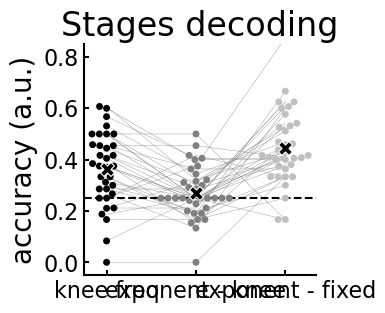

In [384]:
array_list6 = [accuracy_knee,accuracy_K, accuracy_F]
colors = ['black', 'grey', 'silver']

import seaborn
titles =  ['knee freq','exponent - knee','exponent - fixed']


ax = plt.figure(figsize=(3,3))  

ax = seaborn.swarmplot(data=array_list6, palette = colors);
ax.set_xticklabels(titles)

seaborn.scatterplot(x=[0,1,2], y=np.mean(array_list6,1), marker='X', color='black', s=100, zorder=4, legend=False);
plt.plot([array_list6[0], array_list6[1], array_list6[2]], color = 'grey', linewidth = 0.25, linestyle = '-');
ax.axhline(y=0.25, color='black', linestyle='--');

plt.title('Stages decoding', fontsize = 24)
plt.ylabel('accuracy (a.u.)',fontsize=20)

plt.ylim(-0.05, 0.85)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='both', which='both', direction='in', width=1.5, labelsize=16)  # Customize tick properties
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)


#plt.savefig("/home/b1044271/Columbia/Plots/NOV23/iEEG_decoding.svg", dpi = 600)
plt.show()

In [385]:
# FIRST PERMUTATION

from utils import calculate_t_statistic, calculate_cohens_d, perform_permutation_test

ACC = [accuracy_knee,accuracy_K, accuracy_F]

# Specify the number of permutations
num_permutations = 10000

tvalue=np.zeros(3)
pvalue=np.zeros(3)
cohend=np.zeros(3)
for i in np.arange(len(ACC)):
    X = ACC[i]
    # Perform the permutation test
    tvalue[i],pvalue[i],cohend[i] = perform_permutation_test(X, np.ones(17)*0.25, num_permutations)

pvalue_bonf = pvalue * len(ACC)

pvalue_bonf

array([0.0033, 0.5946, 0.    ])

In [395]:
    W_exp   = W_Exp[i][~np.isnan(W_Exp[i])]
    W_knee  = Kn_W[i][~np.isnan(Kn_W[i])]
    mask = np.isfinite(W_knee)
    W_knee = W_knee[mask]
    W_exp2  = W_Exp2[i][~np.isnan(W_Exp2[i])]

    N2_exp   = N2_Exp[i][~np.isnan(N2_Exp[i])]
    N2_knee  = Kn_N2[i][~np.isnan(Kn_N2[i])]
    N2_exp2  = N2_Exp2[i][~np.isnan(N2_Exp2[i])]

    N3_exp   = N3_Exp[i][~np.isnan(N3_Exp[i])]
    N3_knee  = Kn_N3[i][~np.isnan(Kn_N3[i])]
    N3_exp2  = N3_Exp2[i][~np.isnan(N3_Exp2[i])]

    R_exp   = R_Exp[i][~np.isnan(R_Exp[i])]
    R_knee  = Kn_R[i][~np.isnan(Kn_R[i])]
    R_exp2  = R_Exp2[i][~np.isnan(R_Exp2[i])]